In [41]:
import numpy as np
import matplotlib.pyplot as plt 

### LIF neuron model

$$
C_m \frac{dV(t)}{dt} + \frac{V(t) - V_0}{R_m} = I_{inj}
$$

$$
If \; V(t) \; > \; V_{th}, \; then \; V(t) \; = \; V_{reset}
$$

Where:


$C_m$  - membrane capacitance 

$R_m$ - chanal condactivity

$I_{inj}$ - inlected current


$$
V(t_{i+1}) = \left( I_{inj} -  \frac{V(t_{i}) - V_0}{R_m}\right) \cdot \frac{dt}{C_m} + V(t_i)
$$

In [42]:
class Signhal:
    @staticmethod
    def bipolar_rectangle(amplitude = 0.1, frequency = 1, reprtition = 1, n_points = 1000):
        period = 1 / frequency
        time_array = np.linspace(0, reprtition * period, reprtition * n_points)
        half_period = period / 2
        t = time_array
        voltage = []
        for j in range(reprtition):
            for i in t[j * n_points: (j+1) * n_points]:
                if (i <= (t[j * n_points] + half_period/2)) or ((i > (t[j * n_points] + half_period)) and i < (t[j * n_points] + 3/2 *half_period)):
                    voltage.append( 0)
                elif (i > (t[j * n_points] + half_period/2)) and i < (t[j * n_points] + half_period):
                    voltage.append(amplitude)
                elif (i > (t[j * n_points] + 3/2 *half_period)):
                    voltage.append(0)
        voltage[-1] = 0
        V = np.array(voltage)
        return [time_array, V]



In [43]:
class LIFNeuron():

    def __init__(self, capacity: float, resistance: float, V_threshold: float = 0.03, V_reset: float = -0.005, V_0: float = 0, V_start: float = 0) -> None:
        self.cap = capacity / 10 ** 6
        self.res = resistance
        self.V_th = V_threshold
        self.V_res = V_reset
        self.V_0 = V_0
        self.V = [V_start]

    def inject_current(self, time: list[float], curent: list[float]) -> np.array:
        if len(time) != len(curent):
            raise ValueError(f'time and current arrays must have the same lenght, but have {len(time)} and {len(curent)}')
        self.time = time
        self.spikes_time_array = []
        delta_t = np.abs(time[1] - time[0])
        for i in range(len(time) - 1):
            if self.V[i] >= self.V_th:
                self.V.append(self.V_res)
                self.spikes_time_array.append(time[i])
            else:
                self.V.append((curent[i] - (self.V[i] - self.V_0) / self.res) * delta_t / self.cap + self.V[i])
        return self.V
    
    def spikes_time(self):
        return self.spikes_time_array
    
    def plot_spikes(self, ax, **kwargs):
        for spike in self.spikes_time_array:
            ax.plot([spike]*2, [-10, 10], **kwargs)
    
    #def spikes_frequency(self, repetition):
        #(len(self.spikes_time()) - 1)/((self.time[-1] - self.time[0]) * )

500000.0

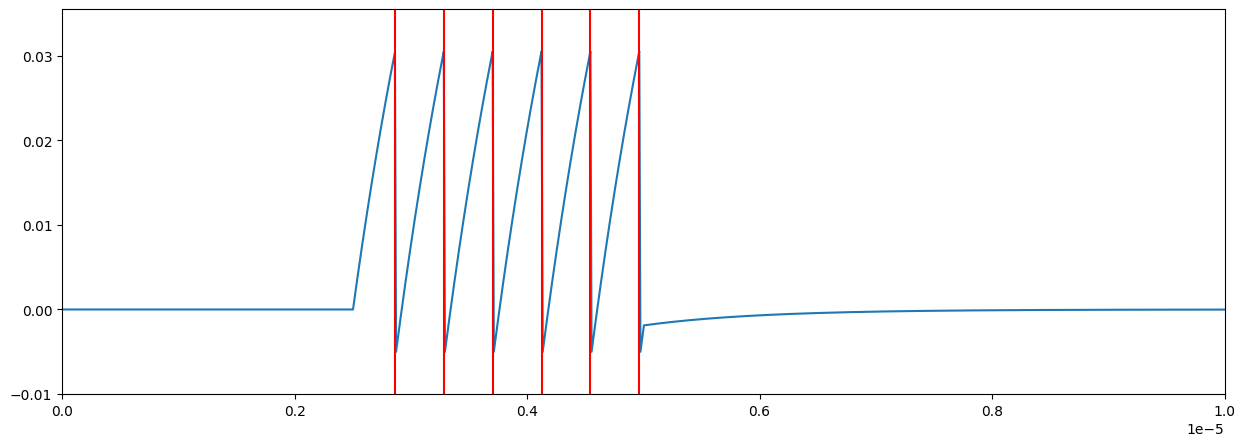

In [44]:
t, I = Signhal.bipolar_rectangle(reprtition=1, amplitude=0.001, frequency= 100000, n_points=1000)
n_1 = LIFNeuron(capacity= 0.01, resistance= 100)
V = n_1.inject_current(time=t, curent=I)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = [15, 5])
ax.plot(t, V)
ax.set(xlim = [t[0], t[-1]], ylim = [min(V) - 0.005, max(V) + 0.005])
n_1.plot_spikes(ax, color = 'red')
spikes_frequency = (len(n_1.spikes_time()) - 1)/(t[-1] - t[0])
spikes_frequency.round(2)

$$
C_m \frac{dV(t)}{dt} + \frac{V(t) - V_0}{R_m} = I_{inj}
$$

In [45]:
def triangle(amplitude = 1, frequency = 1, reprtition = 1, n_points = 1000):
    period = 1 / frequency
    time_array = np.linspace(0, reprtition * period, reprtition * n_points)
    quater_period = period / 4
    t = time_array
    voltage = []
    for j in range(reprtition):
        for i in t[j * n_points: (j+1) * n_points]:
            if i <= (t[j * n_points] + quater_period):
                voltage.append(amplitude / quater_period * (i - t[j * n_points])+ np.random.normal(0,0.005))
            elif (i > (t[j * n_points] + quater_period)) and (i < (t[j * n_points] + 3 * quater_period)):
                voltage.append(- amplitude / quater_period * (i - t[j * n_points] - 3 * quater_period) - amplitude+ np.random.normal(0,0.005))
            elif i > (t[j * n_points] + 3 * quater_period):
                voltage.append(amplitude / quater_period * (i - t[j * n_points]) - 4 * amplitude+ np.random.normal(0,0.005))
    V = np.array(voltage)
    return [time_array, V]

class ThresholdSwitch():
    def __init__(self,  R_off: float = 1_000_000_000, R_on: float = 1_000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and (abs(voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and (abs(voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and (abs(voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and (abs(voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

In [49]:
t = np.linspace(0, 1, 100)
t, V = triangle(amplitude = 2, frequency = 10000, reprtition = 1, n_points = 1000)
R_R = 10**5
ts_1 = ThresholdSwitch()
U_TS = [0]
U_R = [0]
R_TS = [1_000_000_000]
I_C = [0]
I_TS = [0]
I = [0]
C = 10 ** (-10)
delta_t = t[1] - t[0]

for i in range(len(t)-1):
    R_TS.append(ts_1.get_resistance(V[i]))
    U_TS.append(V[i] * R_TS[i] / (R_TS[i] + R_R))
    U_R.append(V[i] - U_TS[i])
    I_C.append(C * (U_TS[i+1] - U_TS[i]) / delta_t)
    I_TS.append(U_TS[i]/R_TS[i])
    I.append(I_TS[i] + I_C[i])

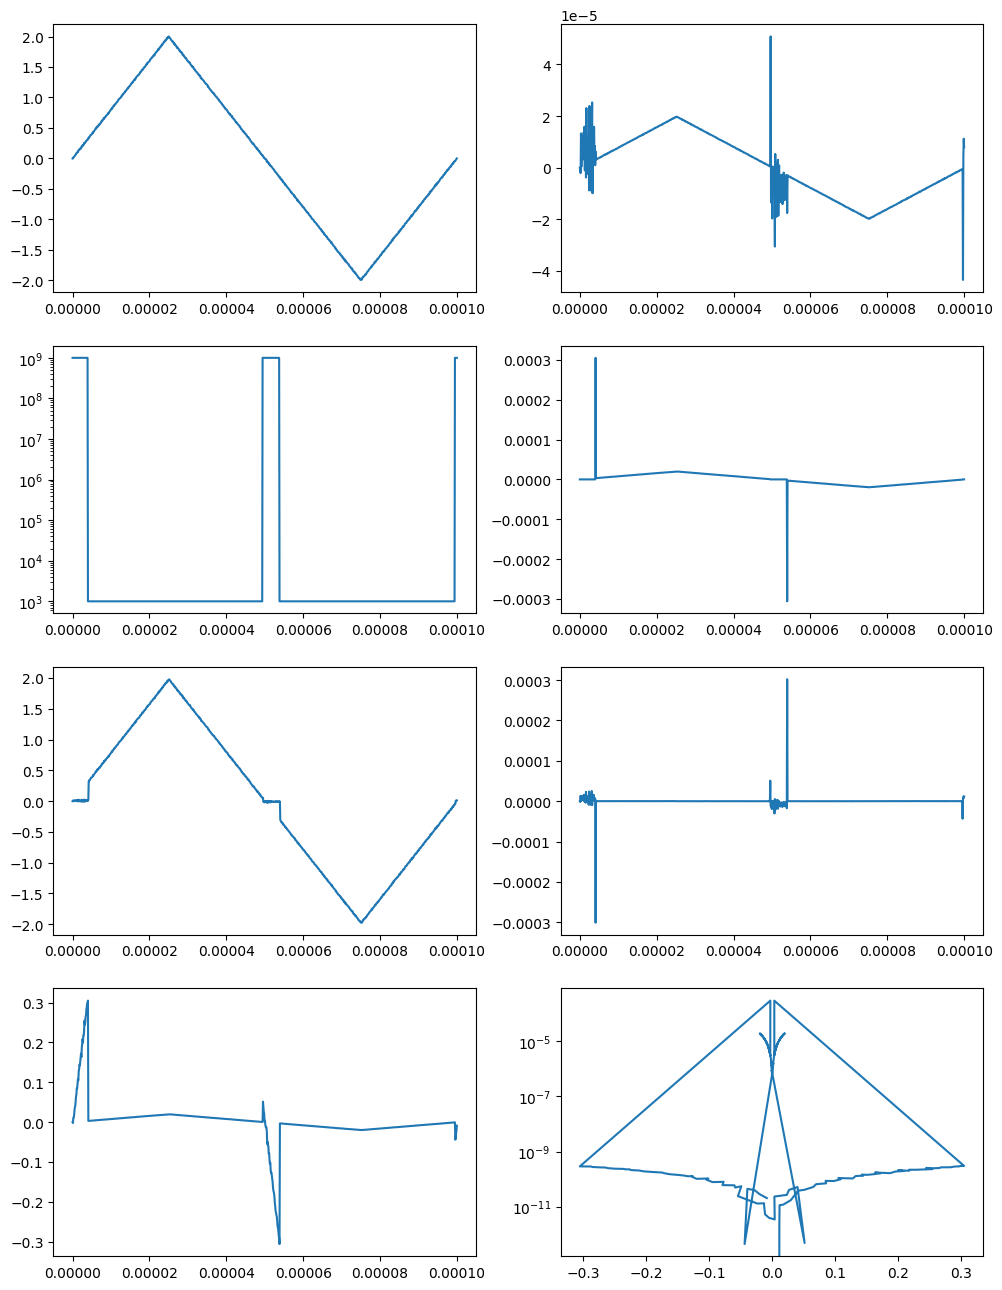

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize = [12,16])

ax[0,0].plot(t, V)
ax[1,0].plot(t, R_TS)
ax[1,0].set_yscale('log')
ax[2,0].plot(t, U_R)
ax[3,0].plot(t, U_TS)

ax[0,1].plot(t, I)
ax[1,1].plot(t, I_TS)
ax[2,1].plot(t, I_C)
ax[3,1].plot(U_TS, np.abs(I_TS))
ax[3,1].set_yscale('log')